In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classification Tree

## Create Artifical dataset

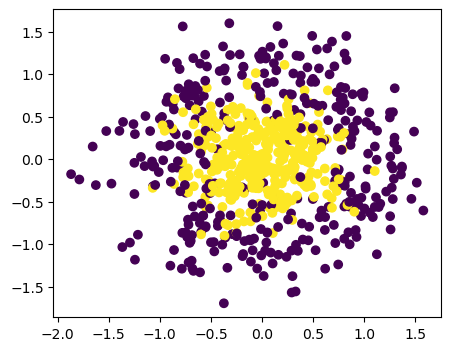

In [2]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=700,factor = 0.3,noise=0.3,random_state=28)

plt.figure(figsize = (5,4))
plt.scatter(x = X[:,0], y = X[:,1], c = y,cmap = 'viridis')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28)

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(490, 2)
(210, 2)

(490,)
(210,)


## Decision Tree Classifier

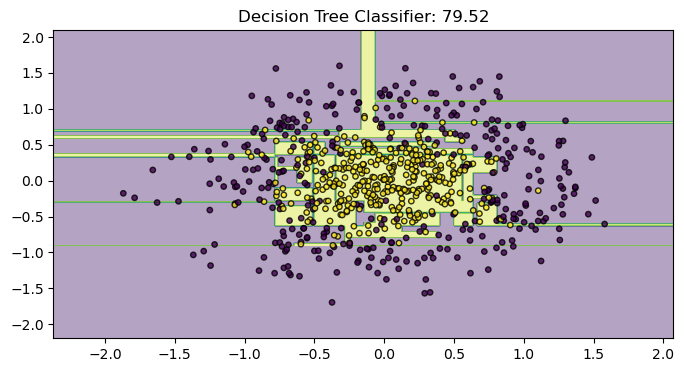

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state=28)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = np.round(100*accuracy_score(y_test,y_pred),2)

# Plotting decision boundary

plt.figure(figsize=(8,4))

# Creating meshgrid
x_min,x_max = X[:,0].min() - 0.5 , X[:,0].max() + 0.5
y_min,y_max = X[:,1].min() - 0.5 , X[:,1].max() + 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.4)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k',cmap = 'viridis',alpha = 0.8, s=15 )
plt.title('Decision Tree Classifier: {}'.format(accuracy))
plt.show()

## Random forest Classifier

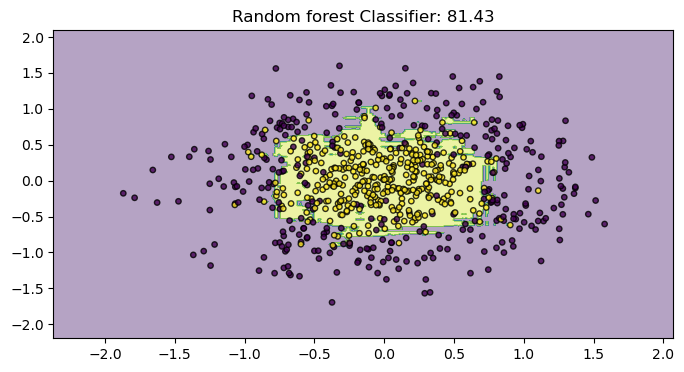

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=500,random_state=28,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = np.round(100*accuracy_score(y_test,y_pred),2)

# Plotting decision boundary

plt.figure(figsize=(8,4))

# Creating meshgrid
x_min,x_max = X[:,0].min() - 0.5 , X[:,0].max() + 0.5
y_min,y_max = X[:,1].min() - 0.5 , X[:,1].max() + 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.4)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k',cmap = 'viridis',alpha = 0.8, s=15 )
plt.title('Random forest Classifier: {}'.format(accuracy))
plt.show()

## Bagging Classifier with Decision tree

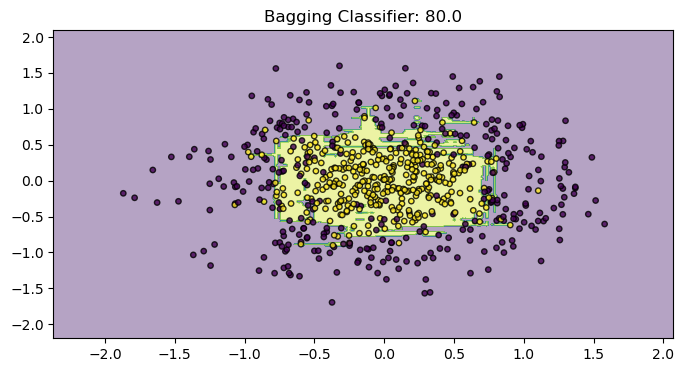

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

clf = BaggingClassifier(estimator= DecisionTreeClassifier(),n_estimators=500,random_state=28,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

accuracy = np.round(100*accuracy_score(y_test,y_pred),2)

# Plotting decision boundary

plt.figure(figsize=(8,4))

# Creating meshgrid
x_min,x_max = X[:,0].min() - 0.5 , X[:,0].max() + 0.5
y_min,y_max = X[:,1].min() - 0.5 , X[:,1].max() + 0.5
xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.4)
plt.scatter(X[:,0], X[:,1],c = y,edgecolor = 'k',cmap = 'viridis',alpha = 0.8, s=15 )
plt.title('Bagging Classifier: {}'.format(accuracy))
plt.show()

# Regression Trees

## Create Artifical Data

In [7]:
n_train = 100
n_test = 500
noise = 0.2

def f(x):
    x = x.ravel()
    return np.exp(-x**2) + 1.5*np.exp(-(x-2)**2)

def generate(n_samples,noise):
    X = np.random.randn(n_samples)*10 - 5
    X = np.sort(X).ravel()
    y = f(X) + np.random.normal(0.0,noise,n_samples)
    X = X.reshape(-1,1)
    
    return X,y

X_train,y_train = generate(n_samples= n_train,noise = noise)
X_test,y_test = generate(n_samples = n_test,noise = noise)
    

(-10.0, 10.0)

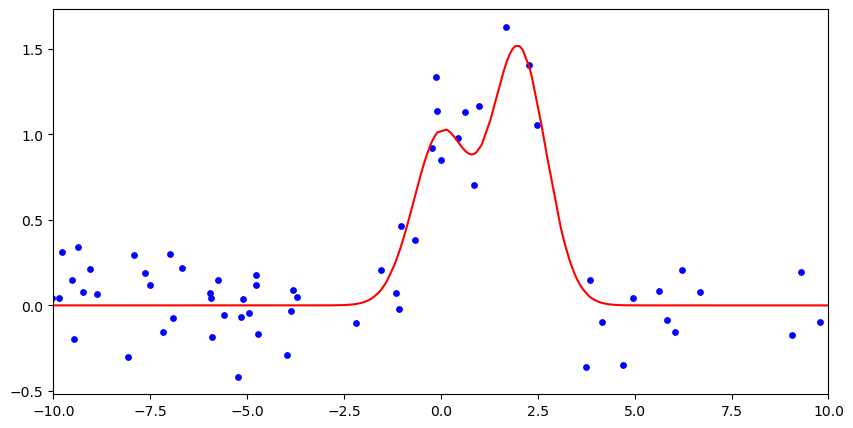

In [8]:
plt.figure(figsize=(10,5))
plt.plot(X_test,f(X_test),'r')
plt.scatter(X_train,y_train,c = 'b',s = 15)
plt.xlim([-10,10])

## Decision Tree Regressor

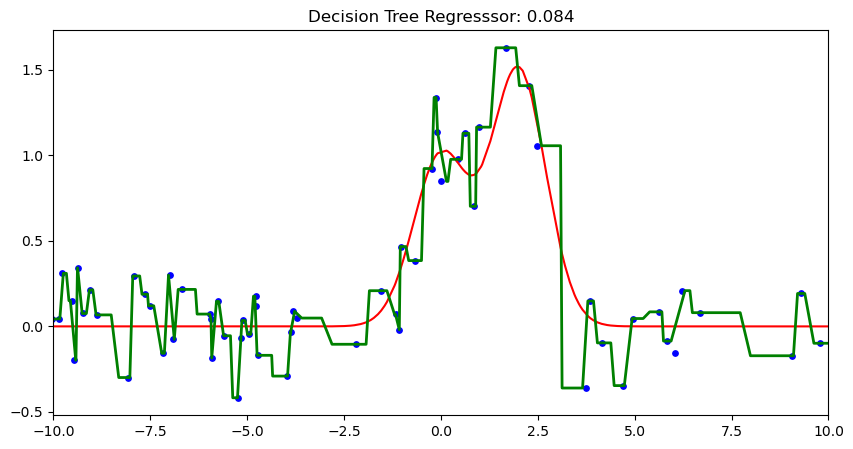

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

clf = DecisionTreeRegressor(random_state=28)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

mse = np.round(mean_squared_error(y_test,y_pred),3)

# Plotting the Fitted Model

plt.figure(figsize=(10,5))
plt.plot(X_test,f(X_test),'r')
plt.scatter(X_train,y_train,c = 'b',s = 15)
plt.plot(X_test,y_pred,c = 'g',lw = 2)
plt.xlim([-10,10])
plt.title('Decision Tree Regresssor: {}'.format(mse))
plt.show()

## Random Forest Regressor

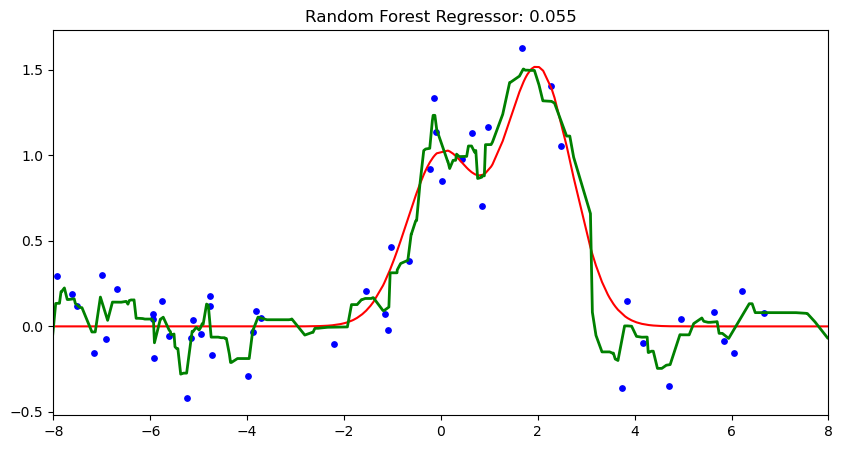

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=1000,random_state=28,n_jobs = -1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

mse = np.round(mean_squared_error(y_test,y_pred),3)

# Plotting the Fitted Model

plt.figure(figsize=(10,5))
plt.plot(X_test,f(X_test),'r')
plt.scatter(X_train,y_train,c = 'b',s = 15)
plt.plot(X_test,y_pred,c = 'g',lw = 2)
plt.xlim([-8,8])
plt.title('Random Forest Regressor: {}'.format(mse))
plt.show()

## Comparing Both the fits

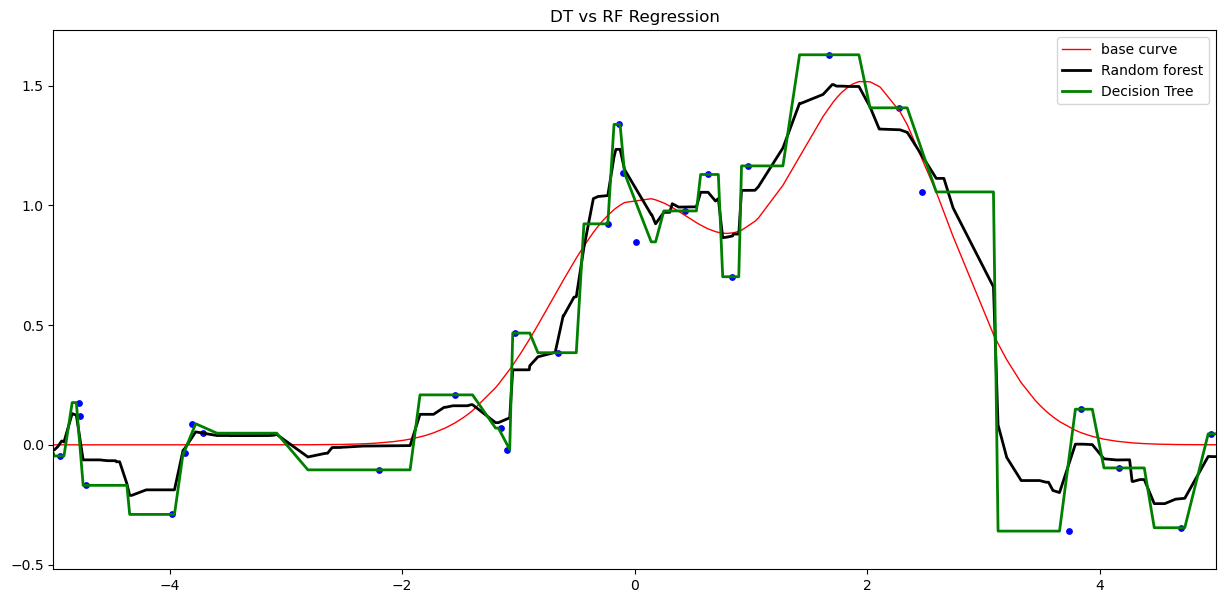

In [11]:
rf_pred = rf.predict(X_test)
dt_pred = clf.predict(X_test)

plt.figure(figsize=(15,7))
plt.scatter(X_train,y_train,c = 'b',s = 15)
plt.plot(X_test,f(X_test),c='r',lw = 1,label = 'base curve')
plt.plot(X_test,rf_pred,c = 'k',lw = 2,label = 'Random forest')
plt.plot(X_test,dt_pred,c = 'g',lw = 2,label = 'Decision Tree')
plt.xlim([-5,5])
plt.title('DT vs RF Regression')
plt.legend()
plt.show()